# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [4]:
# 필요한 모듈 불러오기

from sklearn.model_selection import train_test_split

In [41]:
# train과 test set 분리 (train:test = 7:3 비율로)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [42]:
#필요한 모듈 불러오기

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [43]:
#릿지모델 생성 및 훈련

ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기

pred = ridge.predict(X_test)

#MSE와 RMSE구하기

mse1= mean_squared_error(y_test, pred)
rmse1 = np.sqrt(mse1)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측

ages=pred+1.5

#MSE와 RMSE구하기

mse2 = mean_squared_error(y_test, ages)
rmse2 = np.sqrt(mse2)

print(f'MSE1:{mse1}, RMSE1:{rmse1}')
print(f'최종MSE:{mse2}, 최종RMSE:{rmse2}')


MSE1:4.772148639987027, RMSE1:2.1845248087369087
최종MSE:7.234717548270534, 최종RMSE:2.689743026437755


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [13]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [14]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함

from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer


# 가정: X와 y는 이미 정의된 특성과 타깃 데이터입니다.
# 예: X, y = your_dataset.drop("target", axis=1), your_dataset["target"]

rmse_list = []

for alpha in alphas:
    if alpha == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=alpha)

    # 음수가 되지 않도록 scoring을 -RMSE 형태로 정의
    neg_mse_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    rmse = -neg_mse_scores.mean()
    rmse_list.append(rmse)
    print(f"alpha={alpha}, 평균 RMSE={rmse:.4f}")

# 최소 RMSE를 갖는 alpha 찾기
best_alpha = alphas[np.argmin(rmse_list)]
print(f"\n가장 낮은 평균 RMSE를 갖는 alpha: {best_alpha}")

alpha=0, 평균 RMSE=2.2417
alpha=0.1, 평균 RMSE=2.2371
alpha=1, 평균 RMSE=2.2303
alpha=10, 평균 RMSE=2.3373
alpha=100, 평균 RMSE=2.6212

가장 낮은 평균 RMSE를 갖는 alpha: 1


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [15]:
# 필요한 모듈 임포트

from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [44]:
#모델 생성 및 훈련

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

#예측값 구하기

pred = xgb.predict(X_test)

#MSE와 RMSE구하기

mse3 = mean_squared_error(y_test, pred)
rmse3 = np.sqrt(mse3)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측

ages=pred+1.5

#MSE와 RMSE 구하기

mse4 = mean_squared_error(y_test, ages)
rmse4 = np.sqrt(mse4)

print(f'MSE3:{mse3}, RMSE3:{rmse3}')
print(f'MSE:{mse4}, RMSE:{rmse4}')

MSE3:5.5059685707092285, RMSE3:2.346480038421215
MSE:8.224994659423828, RMSE:2.8679251488530566


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Figure size 1000x600 with 0 Axes>

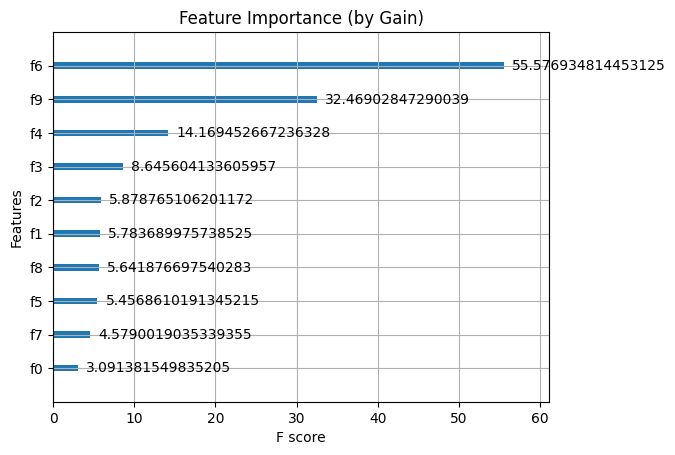

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='gain')
plt.title('Feature Importance (by Gain)')
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [19]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [20]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [61]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3,random_state=42)

print(x_train.shape)
print(y_train.shape)

(124, 13)
(124,)


## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [62]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [63]:
#기울기

lr.coef_

array([[-0.28831633,  0.29194239,  0.24201983, -0.26963319, -0.01937353,
         0.31866733,  0.69695615, -0.00932898,  0.07836957,  0.08406336,
        -0.02447768,  0.38432811,  0.0090838 ],
       [ 0.68271387, -0.67577568, -0.26979085,  0.11834042, -0.00644181,
         0.16275781,  0.28935472,  0.04386988,  0.38583955, -1.0801172 ,
         0.2710536 ,  0.40670509, -0.00776151],
       [-0.39439754,  0.3838333 ,  0.02777103,  0.15129277,  0.02581534,
        -0.48142514, -0.98631087, -0.0345409 , -0.46420912,  0.99605384,
        -0.24657592, -0.7910332 , -0.00132229]])

In [64]:
#절편

print('절편 값:', lr.intercept_)

절편 값: [-0.07432123  0.12973815 -0.05541692]


3-3) 모델의 정확도를 구하세요.

In [65]:
#모델의 예측값 구하기

pred = lr.predict(x_test)

#모델의 정확도 구하기

ac_score = metrics.accuracy_score(y_test, pred)
ac_score

0.9814814814814815